Smoothing bar modified from Ck version

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import math
from scipy import signal
from scipy.fftpack import fft
from scipy import ndimage
from scipy import special
%matplotlib inline

In [29]:
def K(x,s):
    return(np.exp(-(x/s)**2))/s/np.sqrt(np.pi)

In [105]:
xlen = 2000#spatial extend of simulation
dxc = 20/xlen
sigma_h = int(2/dxc)
sigma_c = sigma_h/5
klen = int(sigma_h*3)
xc = np.arange(-10,10,dxc)
xx = np.arange(0,klen*dxc,dxc)
khxs = K(xx,sigma_h*dxc)
KH = np.zeros(klen*2-1)
tmp = khxs[::-1]
KH[0:klen]= tmp[0:klen]
KH[klen:2*klen]=khxs[1:klen]

kcxs = K(xx,sigma_c*dxc)
KC = np.zeros(klen*2-1)
tmp = kcxs[::-1]
KC[0:klen]= tmp[0:klen]
KC[klen:2*klen]=kcxs[1:klen]

In [113]:
hw = int(sigma_c*3)
dt = 0.001
alpha = 40
beta = 2
k = 40
phi = 10
g = 2
gamma = 5
pos_0 = int(xlen/4)
pos = pos_0
nstep = 1500
v = 300

y = np.zeros(xlen) # cone cell output
xx = np.arange(0,xlen)
yy = np.zeros(xlen)
z = np.zeros(xlen) # horizontal cell output
speak = np.zeros(nstep)
rpeak = np.zeros(nstep)
stm = np.zeros([int(xlen),nstep])#input
rsp = np.zeros([int(xlen),nstep])#y output
zts = np.zeros([int(xlen),nstep])#horizontal
rss = np.zeros([int(xlen),nstep])#horizontal
ss = np.zeros([int(xlen),nstep])#bar

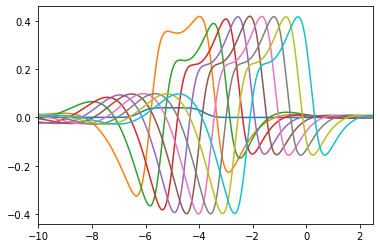

In [114]:
movingbar = np.zeros(xlen)
for i in range(nstep):
    pos = pos + v*dt
    speak[i] = pos
    s = np.zeros(xlen)
    s[int(pos)-hw:int(pos)+hw] = 1
    movingbar = np.vstack((movingbar, s))
    yy = special.erf((xx-pos+hw)/sigma_c) - special.erf((xx-pos-hw)/sigma_c)
    yyy = np.convolve(s,KC,'same')*dxc
    rs = (alpha/k)*yy/yy.max()
    rs = yyy
    ry = np.convolve(y,KH,'same')*dxc # feedback from horizontal cell (y convoluted with horitonatl cell receptive field KH)
    
    dyj =(-alpha*y+k*(rs-phi*z))*dt
    dzj =(-beta*z+g*ry)*dt
    y = y+dyj
    z = z+dzj
    maxpos = np.argmax(y)
    rpeak[i]= maxpos
    stm[:,i] = rs
    rsp[:,i] = y
    zts[:,i] = z
    rss[:,i] = rs
    ss[:,i] = s
    if i%150 == 0:
#     if i == 150:
        #plt.plot(y[maxpos-50:maxpos+50])
#         plt.plot(s)
#         plt.plot(yy)
#         plt.plot(yyy*10**2*2)
        plt.plot(xc,y)
        plt.xlim([-10,2.5])
        #tmp.append(y)
        #plt.plot(rs/7)

0.9999778660000175


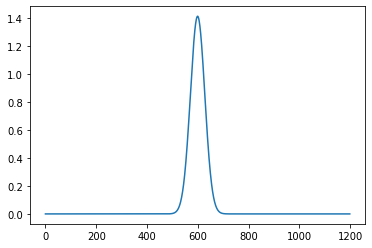

In [115]:
plt.plot(KC)
print(max(rs))

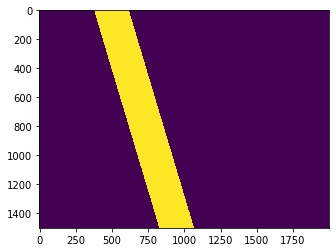

In [116]:
plt.imshow(movingbar)

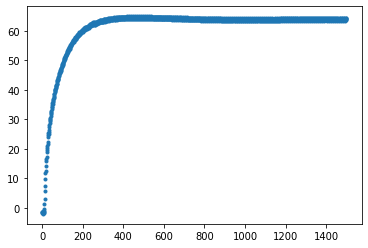

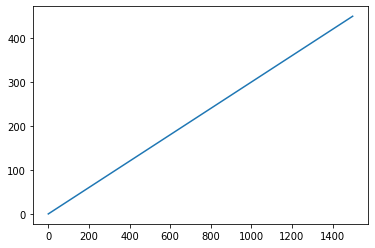

In [117]:
# difference between stimualtion and response peak
plt.plot(rpeak-speak,'.')
# distance travelled
plt.figure()
plt.plot(speak-pos_0)
#plt.ylim([0,15])
#plt.xlim([350,450])

50


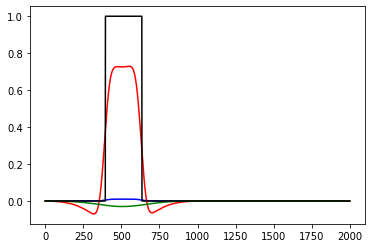

150


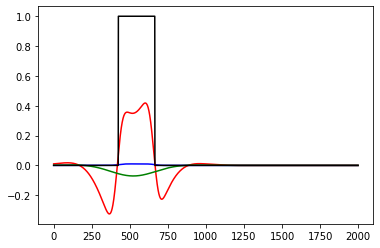

250


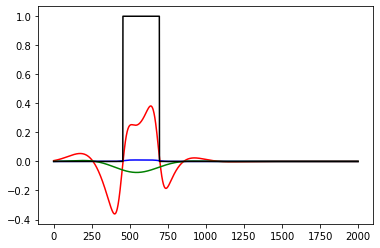

350


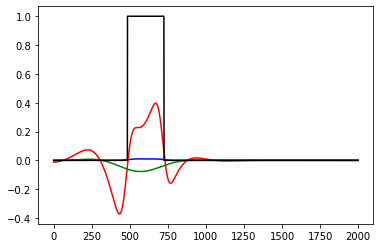

450


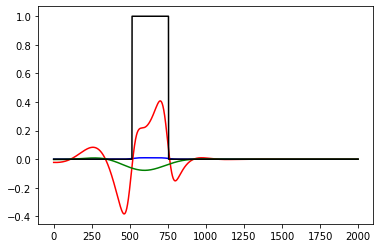

550


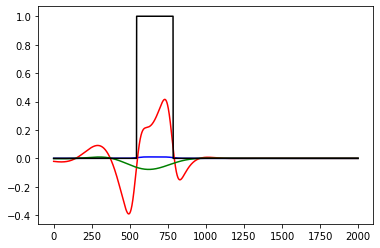

650


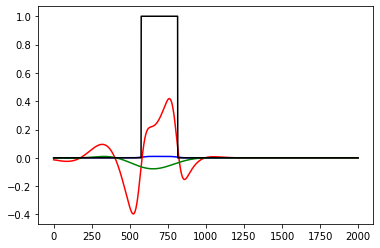

750


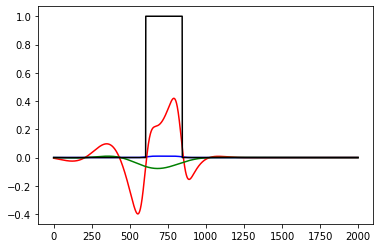

850


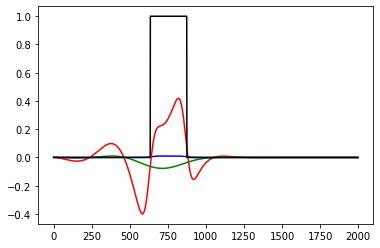

950


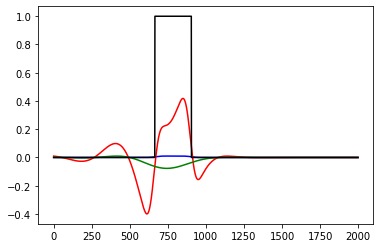

1050


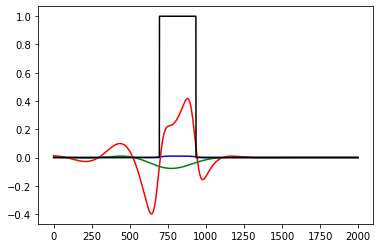

1150


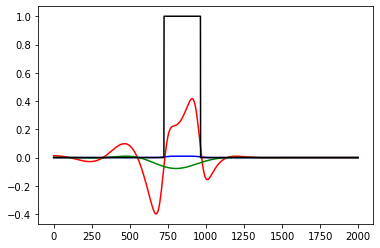

1250


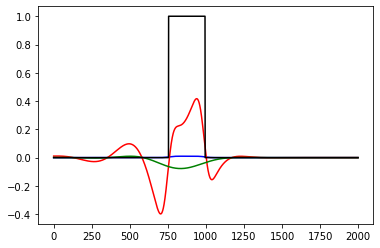

1350


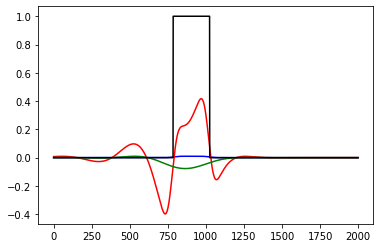

1450


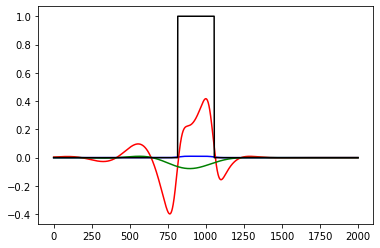

In [59]:
# snapshot at different time
for index in np.arange(50,nstep,100):
    print(index)
    plt.figure()
    #index=10 # large response; weak feedback
    plt.plot(xx,stm[:,index],'b')#stimulus
    plt.plot(xx,rsp[:,index],'r')#y
    plt.plot(xx,-zts[:,index],'g')#z
    plt.plot(xx,ss[:,index],'k')#bar
    plt.show()

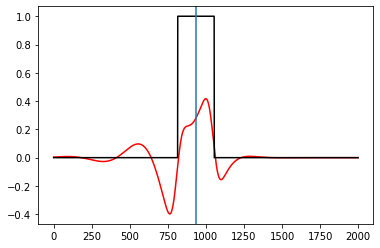

In [60]:
plt.figure()
#index=10 # large response; weak feedback
#plt.plot(xx,stm[:,index],'b')#stimulus
plt.plot(xx,rsp[:,index],'r')#y
#plt.plot(xx,-zts[:,index],'g')#z
plt.plot(xx,ss[:,index],'k')#bar
plt.axvline(speak[index])
plt.savefig('smooth_feedback.png')
